In [ ]:
# prompt: mounting the drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: reading a csv file from drive
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# importing datasets
# Double-check the file name and path for typos
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Autism_Toddler.csv")

# Print the first few rows of the dataset to verify it loaded correctly
print(dataset.head())

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score Sex  \
0   0   0   0   0   0   0   1   1   0    1        28               3   f   
1   1   1   0   0   0   1   1   0   0    0        36               4   m   
2   1   0   0   0   0   0   1   1   0    1        36               4   m   
3   1   1   1   1   1   1   1   1   1    1        24              10   m   
4   1   1   0   1   1   1   1   1   1    1        20               9   f   

        Ethnicity Jaundice Family_mem_with_ASD Who completed the test Class  
0  middle eastern      yes                  no          family member    No  
1  White European      yes                  no          family member   Yes  
2  middle eastern      yes                  no          family member   Yes  
3        Hispanic       no                  no          family member   Yes  
4  White European       no                 yes          family member   Yes  


In [ ]:
"""
# prompt: display attribute with categorical type

categorical_attributes = dataset.select_dtypes(include=['object']).columns
print(categorical_attributes)


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Class'],
      dtype='object')


In [ ]:
"""
#One-hot Encoding
import pandas as pd
# One-hot encoding for nominal categorical variables
dataset = pd.get_dummies(dataset, columns=['gender', 'Partner'])

# Map 'True' to 1 and 'False' to 0 for the newly created one-hot encoded columns if needed.
# For example, if the new column is named 'gender_Male':
dataset['gender_Male'] = dataset['gender_Male'].map({True: 1, False: 0})
dataset['gender_Female'] = dataset['gender_Female'].map({True: 0, False: 1})
dataset['Partner_Yes'] = dataset['Partner_Yes'].map({True: 1, False: 0})
dataset['Partner_No'] = dataset['Partner_No'].map({True: 0, False: 1})

In [ ]:
# prompt: fill the missing value by interpolation

# Fill missing values using interpolation
dataset.interpolate(method='linear', inplace=True)


<ipython-input-101-e672840c25bf>:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dataset.interpolate(method='linear', inplace=True)


In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
# prompt: all categorical value into numerical value

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col] = le.fit_transform(dataset[col])


In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,4,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,4,1
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,4,1
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,4,1
4,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,4,1


In [ ]:
dataset.shape

(373, 10)

In [ ]:
# prompt: number of classes and count

# Assuming 'Class' is the target variable
class_counts = dataset['Class'].value_counts()
print(class_counts)

Class
1    728
0    326
Name: count, dtype: int64


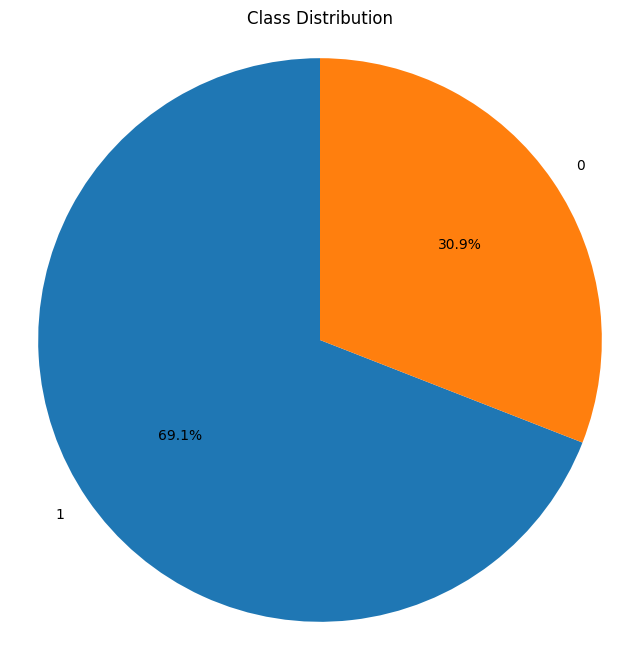

In [ ]:
# prompt: draw pie chart for class count with number of class labels values

import matplotlib.pyplot as plt
# Assuming 'Class' is the target variable
class_counts = dataset['Class'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# prompt: over sampling using Tomek Links and SMOTE

import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# Separate features and target variable
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# Apply Tomek Links
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X, y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Check the class distribution after oversampling
print(pd.Series(y_resampled).value_counts())


Class
0    715
1    715
Name: count, dtype: int64


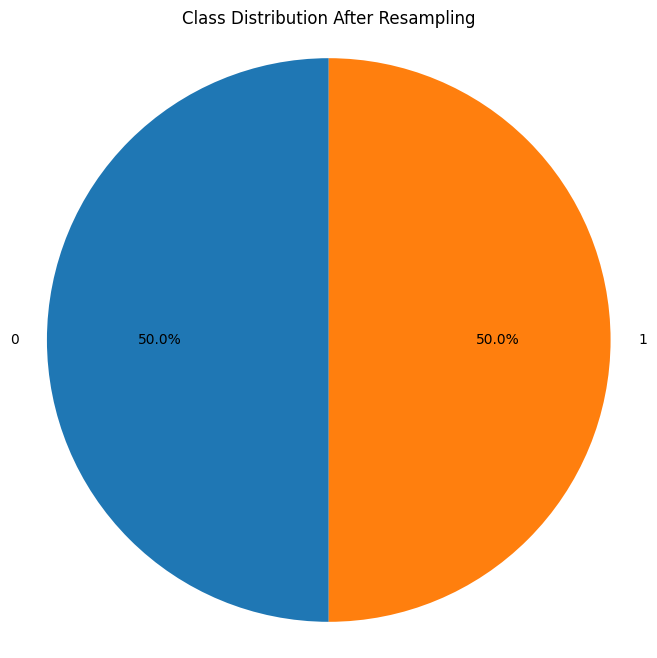

In [ ]:
# prompt: draw pie chart for class count with number of class labels values

import pandas as pd
import matplotlib.pyplot as plt
# Check the class distribution after oversampling
class_counts_resampled = pd.Series(y_resampled).value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts_resampled, labels=class_counts_resampled.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution After Resampling')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# prompt: normalization with logarithmic scaling

import numpy as np

# Apply logarithmic scaling
X_resampled = np.log1p(X_resampled)


In [ ]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,4,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,4,1
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,4,1
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,4,1
4,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,4,1


In [ ]:
"""
#intutionistic Fuzzy
import random

def noise(dataset, percent_noise):
    # Assuming percent_noise is a float between 0 and 1
    num_noise_values = round(len(dataset.columns) * percent_noise, 0)  # Calculate based on columns
    num_noise_values = min(int(num_noise_values), len(dataset.columns) - 1)  # Ensure it's not larger than the number of columns and leave room for the 'Class' column
    noise_indices = random.sample(range(len(dataset.columns)), num_noise_values)  # Sample from column indices
    for noise_index in noise_indices:
      if dataset.columns[noise_index] != 'Class':
        # Generate random intuitionistic fuzzy values
        membership = random.random()
        non_membership = random.random()
        if membership + non_membership > 1:
          non_membership = 1 - membership
        # Modify a random row within the selected column
        random_row = random.randint(0, len(dataset) - 1)
        # Convert tuple to string for storage in DataFrame
        dataset.iloc[random_row, noise_index] = str((membership, non_membership))
    return dataset

# Example usage:
noisy_dataset = noise(dataset.copy(), 0.5)  # Add 50% noise
dataset = noisy_dataset
dataset.head()

<ipython-input-22-a29a326d4588>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '(0.6886287950096543, 0.026197925413962153)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.iloc[random_row, noise_index] = str((membership, non_membership))
<ipython-input-22-a29a326d4588>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '(0.27102815325019947, 0.7214432142621563)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.iloc[random_row, noise_index] = str((membership, non_membership))
<ipython-input-22-a29a326d4588>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '(0.6943735788672339, 0.30562642113276606)' has dtype incompatible with int64, please explicitly cast to a compatible dtype fi

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Class,gender_Female,gender_Male,Partner_No,Partner_Yes
0,0,0,1,0,1,0,0,2,0,0,...,0,1,2,29.85,2505,0,0,0,1,1
1,0,0,34,1,0,0,2,0,2,0,...,1,0,3,56.95,1466,0,1,1,0,0
2,0,0,2,1,0,0,2,2,0,0,...,0,1,3,53.85,157,1,1,1,0,0
3,0,0,45,0,1,0,2,0,2,2,...,1,0,0,42.3,1400,0,1,1,0,0
4,0,0,2,1,0,1,0,0,0,0,...,0,1,2,70.7,925,1,0,0,0,0


In [ ]:
#Blockchain
!pip install pycryptodome
import random
import hashlib
from Crypto.Random import get_random_bytes

def generate_noise_with_blockchain(dataset, percent_noise):
    """
    Generates noise in the dataset using a simplified blockchain-inspired approach.

    Args:
      dataset: The pandas DataFrame to add noise to.
      percent_noise: The percentage of values to replace with noise.

    Returns:
      The dataset with added noise.
    """

    # Calculate the number of noise values to introduce
    num_noise_values = round(len(dataset) * percent_noise, 0)

    # Select random indices for noise
    noise_indices = random.sample(range(len(dataset)), int(num_noise_values))

    # Simplified blockchain-like noise generation
    for index in noise_indices:
        # Generate a random key
        key = get_random_bytes(16)
        # Hash the key to create a "block"
        hashed_key = hashlib.sha256(key).hexdigest()
        # Use the hashed key as the noise value
        for col in dataset.columns:
            if col != 'Class':
                # Convert the hexadecimal substring to an integer first, then to a float
                dataset.loc[index, col] = float(int(hashed_key[:8], 16)) / 10000000  # Normalize the hash to a smaller value

    return dataset

# Example usage
dataset = generate_noise_with_blockchain(dataset, 0.5)
dataset.head()

<ipython-input-135-e1db3ab2848e>:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '213.3900703' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[index, col] = float(int(hashed_key[:8], 16)) / 10000000  # Normalize the hash to a smaller value


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,0
1,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,23.474121,1
2,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,1
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1
4,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,9.000000,0.000000,5.000000,0.000000,1.000000,4.000000,1


In [ ]:
"""
#One-Time Pad (OTP) approach

import random

def generate_noise_with_otp(dataset, percent_noise):
    """
    Generates noise in the dataset using a One-Time Pad (OTP) approach.

    Args:
      dataset: The pandas DataFrame to add noise to.
      percent_noise: The percentage of values to replace with noise.

    Returns:
      The dataset with added noise.
    """

    # Calculate the number of noise values to introduce
    num_noise_values = round(len(dataset) * percent_noise, 0)

    # Select random indices for noise
    noise_indices = random.sample(range(len(dataset)), int(num_noise_values))

    # OTP noise generation
    for index in noise_indices:
        for col in dataset.columns:
            if col != 'Class':
                value = dataset.loc[index, col]
                if isinstance(value, str):  # Check if the value is a tuple string
                    try:
                        # Attempt to convert the tuple string to a tuple of floats
                        membership, non_membership = eval(value)
                        # Apply noise to each float separately (example - you might need to adjust based on your needs)
                        noisy_membership = membership ^ int(''.join(random.choice('01') for _ in range(8)), 2)  # Example noise for membership
                        noisy_non_membership = non_membership ^ int(''.join(random.choice('01') for _ in range(8)), 2)  # Example noise for non-membership
                        # Convert back to string for storage
                        dataset.loc[index, col] = str((noisy_membership, noisy_non_membership))
                    except:
                        # Handle cases where conversion fails (non-tuple strings)
                        pass
                else:  # Handle numeric values
                    # Generate a random OTP key (same length as the value)
                    otp_key = ''.join(random.choice('01') for _ in str(dataset.loc[index, col]))
                    # XOR the value with the OTP key (simple XOR for demonstration)
                    noisy_value = int(dataset.loc[index, col]) ^ int(otp_key, 2)
                    dataset.loc[index, col] = noisy_value

    return dataset

# Example usage
dataset = generate_noise_with_otp(dataset, 0.5)
dataset.head()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Class
0,1841.000000,1497.000000,1719.000000,889.000000,389.000000,1946.000000,913.000000,1875.000000,1603.000000,2
1,21.622558,21.622558,21.622558,21.622558,21.622558,21.622558,21.622558,21.622558,21.622558,2
2,50.639349,50.639349,50.639349,50.639349,50.639349,50.639349,50.639349,50.639349,50.639349,1
3,1.000000,76.000000,12.000000,2.500000,28.000000,0.500000,1738.000000,0.713000,1.010000,1
4,2.000000,80.000000,4.000000,4.000000,24.000000,5.000000,1677.000000,20.000000,2.000000,1


In [ ]:

#Quantum Encryption
!pip install --upgrade qiskit
!pip install qiskit_aer
from qiskit import transpile

import random
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

def generate_noise_with_quantum(dataset, percent_noise):
    """
    Generates noise in the dataset using a quantum encryption approach.

    Args:
      dataset: The pandas DataFrame to add noise to.
      percent_noise: The percentage of values to replace with noise.

    Returns:
      The dataset with added noise.
    """

    # Calculate the number of noise values to introduce
    num_noise_values = round(len(dataset) * percent_noise, 0)

    # Select random indices for noise
    noise_indices = random.sample(range(len(dataset)), int(num_noise_values))

    # Quantum noise generation
    for index in noise_indices:
        for col in dataset.columns:
            if col != 'Class':
                value = dataset.loc[index, col]
                if isinstance(value, str):  # Check if the value is a tuple string
                    try:
                        # Attempt to convert the tuple string to a tuple of floats
                        membership, non_membership = eval(value)
                        # Apply quantum noise to each float separately (example - you might need to adjust based on your needs)
                        noisy_membership = apply_quantum_noise(membership)  # Example quantum noise for membership
                        noisy_non_membership = apply_quantum_noise(non_membership)  # Example quantum noise for non-membership
                        # Convert back to string for storage
                        dataset.loc[index, col] = str((noisy_membership, noisy_non_membership))
                    except:
                        # Handle cases where conversion fails (non-tuple strings)
                        pass
                else:  # Handle numeric values
                    # Apply quantum noise to the value
                    noisy_value = apply_quantum_noise(value)
                    dataset.loc[index, col] = noisy_value

    return dataset

def apply_quantum_noise(value):
    """
    Applies quantum noise to a value using a simple quantum circuit.

    Args:
      value: The value to add noise to.

    Returns:
      The value with added quantum noise.
    """

    # Create a simple quantum circuit
    circuit = QuantumCircuit(1, 1)
    circuit.h(0)  # Apply Hadamard gate for superposition
    circuit.measure(0, 0)  # Measure the qubit

    # Execute the circuit
    backend = Aer.get_backend('qasm_simulator')
    # Pass shots to execute function instead of transpile
    job = backend.run(transpile(circuit, backend), shots=1)
    result = job.result()
    counts = result.get_counts(circuit)

    # Extract the measurement result
    quantum_noise = int(list(counts.keys())[0])

    # Apply the noise to the value (example - you might need to adjust based on your needs)
    noisy_value = value + quantum_noise * 0.1  # Example noise application

    return noisy_value
# Example usage
dataset = generate_noise_with_quantum(dataset, 0.5)
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,179.724571,0
1,23.474121,23.574121,23.474121,23.574121,23.474121,23.474121,23.574121,23.574121,23.574121,23.474121,23.574121,23.574121,23.574121,23.474121,23.474121,23.474121,23.574121,1
2,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,79.593063,1
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1
4,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,9.000000,0.000000,5.000000,0.000000,1.000000,4.000000,1


In [ ]:
# prompt: split training and test dataset

from sklearn.model_selection import train_test_split

# Assuming 'Class' is the target variable
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

# Assuming 'Class' is the target variable
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7630331753554502


In [ ]:
# prompt: decision tree plot
"""
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.show()


SyntaxError: incomplete input (<ipython-input-24-1847d457f29f>, line 2)

In [ ]:
# prompt: find accuracy, precision, recall, specificity, f1 score, kappa constant
"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix

# Assuming y_test and y_pred are defined from previous code

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt}")

# Calculate precision
# Calculate precision
precision_dt = precision_score(y_test, y_pred, average='macro') # Set average to 'macro', 'micro', or 'weighted'
print(f"Precision: {precision_dt}")

# Calculate recall
# Calculate recall
recall_dt = recall_score(y_test, y_pred, average='macro') # Set average to 'macro', 'micro', or 'weighted'
print(f"Recall: {recall_dt}")

# Calculate F1-score
# Calculate F1-score
f1_dt = f1_score(y_test, y_pred, average='macro') # Set average to 'macro', 'micro', or 'weighted'
print(f"F1-score: {f1_dt}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity_dt = tn / (tn + fp)
print(f"Specificity: {specificity_dt}")

# Calculate Kappa constant
kappa_dt = cohen_kappa_score(y_test, y_pred)
print(f"Kappa constant: {kappa_dt}")


Accuracy: 0.8266666666666667
Precision: 0.6582934609250399
Recall: 0.6657196969696969
F1-score: 0.6473748473748474


ValueError: too many values to unpack (expected 4)

In [ ]:
# prompt: construct decision tree with post pruning
"""
import matplotlib.pyplot as plt
from sklearn import tree # Import the 'tree' module
# Create a decision tree classifier with pruning
clf_pruned = DecisionTreeClassifier(ccp_alpha=0.01)  # Adjust ccp_alpha for pruning strength

# Train the classifier
clf_pruned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned = clf_pruned.predict(X_test)

# Evaluate the accuracy of the pruned model
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print("Accuracy (Pruned):", accuracy_pruned)

# Plot the pruned decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf_pruned, filled=True) # Now you can use 'tree'
plt.show()

SyntaxError: incomplete input (<ipython-input-15-3ab426815994>, line 2)

In [ ]:
# prompt: find accuracy, precision, recall, specificity, f1 score, kappa constant

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix

# Assuming y_test and y_pred are defined from previous code

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt}")

# Calculate precision
# Calculate precision
precision_dt = precision_score(y_test, y_pred, average='macro') # Set average to 'macro', 'micro', or 'weighted'
print(f"Precision: {precision_dt}")

# Calculate recall
# Calculate recall
recall_dt = recall_score(y_test, y_pred, average='macro') # Set average to 'macro', 'micro', or 'weighted'
print(f"Recall: {recall_dt}")

# Calculate F1-score
# Calculate F1-score
f1_dt = f1_score(y_test, y_pred, average='macro') # Set average to 'macro', 'micro', or 'weighted'
print(f"F1-score: {f1_dt}")

# Calculate specificity
cm = confusion_matrix(y_test, y_pred) # Calculate the confusion matrix
# Print the confusion matrix to check dimensions
print(f"Confusion Matrix:\n {cm}")
# tn, fp, fn, tp = cm.ravel() # Flatten the confusion matrix if it's a 2x2 matrix
# specificity_dt = tn / (tn + fp)
# print(f"Specificity: {specificity_dt}")

#For multiclass classification, you can't calculate specificity in the traditional way.
#Consider using other metrics like per-class accuracy, precision, recall, or F1-score.

# Calculate Kappa constant
kappa_dt = cohen_kappa_score(y_test, y_pred)
print(f"Kappa constant: {kappa_dt}")

Accuracy: 0.7630331753554502
Precision: 0.7333301027330879
Recall: 0.7457134109001837
F1-score: 0.7381874131427437
Confusion Matrix:
 [[ 48  21]
 [ 29 113]]
Kappa constant: 0.477205153617443


In [ ]:
"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, cohen_kappa_score

# Assuming y_test and y_pred are already defined from your previous code

# Calculate accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned )
print("Accuracy:", accuracy_pruned)

# Calculate precision
precision_pruned = precision_score(y_test, y_pred_pruned , average='weighted')  # Use 'weighted' for multi-class
print("Precision:", precision_pruned)

# Calculate recall
recall_pruned = recall_score(y_test, y_pred_pruned , average='weighted')  # Use 'weighted' for multi-class
print("Recall:", recall_pruned)

# Calculate specificity (handling multi-class)
cm = confusion_matrix(y_test, y_pred_pruned )
specificity_pruned = []
for i in range(cm.shape[0]):
    true_negatives = sum(cm[j, k] for j in range(cm.shape[0]) for k in range(cm.shape[1]) if j != i and k != i)
    false_positives = sum(cm[j, i] for j in range(cm.shape[0]) if j != i)
    specificity_pruned.append(true_negatives / (true_negatives + false_positives))
print("Specificity (per class):", specificity_pruned)

# Calculate F1-score
f1_pruned = f1_score(y_test, y_pred_pruned , average='weighted')  # Use 'weighted' for multi-class
print("F1-score:", f1_pruned)

# Calculate Kappa statistic
kappa_pruned = cohen_kappa_score(y_test, y_pred_pruned )
print("Kappa:", kappa_pruned)

Accuracy: 0.7192982456140351
Precision: 0.8065065576562765
Recall: 0.7192982456140351
Specificity (per class): [0.2558139534883721, 1.0]
F1-score: 0.661939011001322
Kappa: 0.29980806142034555


In [ ]:
# prompt: construct random forest

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.7582938388625592


In [ ]:
# prompt: find accuracy, precision, recall, specificity,f1-score and kappa constant

# Assuming y_test and y_pred_rf are already defined from your Random Forest model

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Calculate precision
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # Use 'weighted' for multi-class
print("Precision:", precision_rf)

# Calculate recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')  # Use 'weighted' for multi-class
print("Recall:", recall_rf)

# Calculate specificity (handling multi-class)
cm = confusion_matrix(y_test, y_pred_rf)
specificity_rf = []
for i in range(cm.shape[0]):
    true_negatives = sum(cm[j, k] for j in range(cm.shape[0]) for k in range(cm.shape[1]) if j != i and k != i)
    false_positives = sum(cm[j, i] for j in range(cm.shape[0]) if j != i)
    if true_negatives + false_positives == 0:
        specificity_rf.append(0.0)  # Handle potential division by zero
    else:
        specificity_rf.append(true_negatives / (true_negatives + false_positives))
print("Specificity (per class):", specificity_rf)

# Calculate F1-score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')  # Use 'weighted' for multi-class
print("F1-score:", f1_rf)

# Calculate Kappa statistic
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
print("Kappa:", kappa_rf)


Accuracy: 0.7582938388625592
Precision: 0.7655465018523139
Recall: 0.7582938388625592
Specificity (per class): [0.795774647887324, 0.6811594202898551]
F1-score: 0.7610740765432638
Kappa: 0.4648132491172229


In [ ]:
# prompt: support vector machine classification

from sklearn.svm import SVC

# Create an SVM classifier
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can experiment with different kernels

# Train the classifier
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Calculate other metrics (precision, recall, specificity, F1-score, Kappa)
# ... (Use the same code as in the Random Forest section, replacing y_pred_rf with y_pred_svm)


SVM Accuracy: 0.6729857819905213


In [ ]:
# prompt: find accuracy, precision, recall, specificity,f1-score and kappa constant

# Assuming y_test and y_pred_svm are already defined from your SVM model

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

# Calculate precision
precision_svm  = precision_score(y_test, y_pred_svm, average='weighted')  # Use 'weighted' for multi-class
print("Precision:", precision_svm)

# Calculate recall
recall_svm  = recall_score(y_test, y_pred_svm, average='weighted')  # Use 'weighted' for multi-class
print("Recall:", recall_svm)

# Calculate specificity (handling multi-class)
cm = confusion_matrix(y_test, y_pred_svm)
specificity_svm  = []
for i in range(cm.shape[0]):
    true_negatives = sum(cm[j, k] for j in range(cm.shape[0]) for k in range(cm.shape[1]) if j != i and k != i)
    false_positives = sum(cm[j, i] for j in range(cm.shape[0]) if j != i)
    if true_negatives + false_positives == 0:
        specificity_svm .append(0.0)  # Handle potential division by zero
    else:
        specificity_svm .append(true_negatives / (true_negatives + false_positives))
print("Specificity (per class):", specificity_svm)

# Calculate F1-score
f1_svm  = f1_score(y_test, y_pred_svm, average='weighted')  # Use 'weighted' for multi-class
print("F1-score:", f1_svm )

# Calculate Kappa statistic
kappa_svm  = cohen_kappa_score(y_test, y_pred_svm)
print("Kappa:", kappa_svm )


Accuracy: 0.6729857819905213
Precision: 0.45290986276139344
Recall: 0.6729857819905213
Specificity (per class): [1.0, 0.0]
F1-score: 0.5414389860773599
Kappa: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# prompt: Classification model for neural network

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for 'Class'

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1687 - loss: 74.5485 - val_accuracy: 0.7156 - val_loss: 5.1257
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 3.6341 - val_accuracy: 0.7441 - val_loss: 0.5861
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 1.0216 - val_accuracy: 0.7630 - val_loss: 0.9211
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7482 - loss: 0.6727 - val_accuracy: 0.5450 - val_loss: 1.5368
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6927 - loss: 1.4481 - val_accuracy: 0.8246 - val_loss: 1.1447
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7759 - loss: 0.7824 - val_accuracy: 0.5687 - val_loss: 0.7397
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7819 - loss: 0.8751 - val_accuracy: 0.8389 - val_loss: 0.4217
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7659 - loss: 0.6032 - val_accuracy: 0.5782 - val_loss: 0.9881
E

In [ ]:
# prompt: find accuracy, precision, recall, specificity,f1-score and kappa constant

import numpy as np
# Assuming y_test and model are already defined from your Neural Network model

# Predict probabilities for test set
y_pred_proba = model.predict(X_test)

# Get predicted classes
y_pred_nn = np.argmax(y_pred_proba, axis=1)

# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy:", accuracy_nn)

# Calculate precision
precision_nn = precision_score(y_test, y_pred_nn, average='weighted')  # Use 'weighted' for multi-class
print("Precision:", precision_nn)

# Calculate recall
recall_nn = recall_score(y_test, y_pred_nn, average='weighted')  # Use 'weighted' for multi-class
print("Recall:", recall_nn)

# Calculate specificity (handling multi-class)
cm = confusion_matrix(y_test, y_pred_nn)
specificity_nn = []
for i in range(cm.shape[0]):
    true_negatives = sum(cm[j, k] for j in range(cm.shape[0]) for k in range(cm.shape[1]) if j != i and k != i)
    false_positives = sum(cm[j, i] for j in range(cm.shape[0]) if j != i)
    if true_negatives + false_positives == 0:
        specificity_nn.append(0.0)  # Handle potential division by zero
    else:
        specificity_nn.append(true_negatives / (true_negatives + false_positives))
print("Specificity (per class):", specificity_nn)

# Calculate F1-score
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')  # Use 'weighted' for multi-class
print("F1-score:", f1_nn)

# Calculate Kappa statistic
kappa_nn = cohen_kappa_score(y_test, y_pred_nn)
print("Kappa:", kappa_nn)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy: 0.8625592417061612
Precision: 0.8807133442569097
Recall: 0.8625592417061612
Specificity (per class): [0.9929577464788732, 0.5942028985507246]
F1-score: 0.8518095517379284
Kappa: 0.652822695035461


In [ ]:
# prompt: classification model for XGBoost

import xgboost as xgb

# Assuming X_train, X_test, y_train, y_test are already defined

# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3)  # Assuming 3 classes for 'Class'

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the accuracy of the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Calculate other metrics (precision, recall, specificity, F1-score, Kappa)
# ... (Use the same code as in the previous sections, replacing y_pred_* with y_pred_xgb)


XGBoost Accuracy: 0.7867298578199052


In [ ]:
# prompt: classification model for XGBoost

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Assuming X_train, X_test, y_train, y_test are already defined

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your training labels and transform them
y_train_encoded = le.fit_transform(y_train)

# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3)  # Assuming 3 classes for 'Class'

# Train the classifier using the encoded labels
xgb_clf.fit(X_train, y_train_encoded)

# Make predictions on the test set (remember to encode y_test as well)
y_pred_xgb = xgb_clf.predict(X_test)

# Decode the predicted labels back to their original form
y_pred_xgb = le.inverse_transform(y_pred_xgb)

# Evaluate the accuracy of the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Calculate other metrics (precision, recall, specificity, F1-score, Kappa)
# ... (Use the same code as in the previous sections, replacing y_pred_* with y_pred_xgb)

XGBoost Accuracy: 0.7867298578199052


In [ ]:
# prompt: find accuracy, precision, recall, specificity,f1-score and kappa constant

# Assuming y_test and y_pred_xgb are already defined from your XGBoost model

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

# Calculate precision
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')  # Use 'weighted' for multi-class
print("Precision:", precision_xgb)

# Calculate recall
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')  # Use 'weighted' for multi-class
print("Recall:", recall_xgb)

# Calculate specificity (handling multi-class)
cm = confusion_matrix(y_test, y_pred_xgb)
specificity_xgb = []
for i in range(cm.shape[0]):
    true_negatives = sum(cm[j, k] for j in range(cm.shape[0]) for k in range(cm.shape[1]) if j != i and k != i)
    false_positives = sum(cm[j, i] for j in range(cm.shape[0]) if j != i)
    if true_negatives + false_positives == 0:
        specificity_xgb.append(0.0)  # Handle potential division by zero
    else:
        specificity_xgb.append(true_negatives / (true_negatives + false_positives))
print("Specificity (per class):", specificity_xgb)

# Calculate F1-score
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')  # Use 'weighted' for multi-class
print("F1-score:", f1_xgb)

# Calculate Kappa statistic
kappa_xgb = cohen_kappa_score(y_test, y_pred_xgb)
print("Kappa:", kappa_xgb)


Accuracy: 0.7867298578199052
Precision: 0.7875475974397019
Recall: 0.7867298578199052
Specificity (per class): [0.8380281690140845, 0.6811594202898551]
F1-score: 0.7871202142333827
Kappa: 0.5172606639890183


In [ ]:
# prompt: classification model for adaboost

from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)  # Adjust n_estimators as needed

# Train the classifier
ada_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = ada_clf.predict(X_test)

# Evaluate the accuracy of the AdaBoost model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", accuracy_ada)

# Calculate other metrics (precision, recall, specificity, F1-score, Kappa)
# ... (Use the same code as in the previous sections, replacing y_pred_* with y_pred_ada)

# Assuming y_test and y_pred_ada are already defined from your AdaBoost model

# Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", accuracy_ada)

# Calculate precision
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')  # Use 'weighted' for multi-class
print("Precision:", precision_ada)

# Calculate recall
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')  # Use 'weighted' for multi-class
print("Recall:", recall_ada)

# Calculate specificity (handling multi-class)
cm = confusion_matrix(y_test, y_pred_ada)
specificity_ada = []
for i in range(cm.shape[0]):
    true_negatives = sum(cm[j, k] for j in range(cm.shape[0]) for k in range(cm.shape[1]) if j != i and k != i)
    false_positives = sum(cm[j, i] for j in range(cm.shape[0]) if j != i)
    if true_negatives + false_positives == 0:
        specificity_ada.append(0.0)  # Handle potential division by zero
    else:
        specificity_ada.append(true_negatives / (true_negatives + false_positives))
print("Specificity (per class):", specificity_ada)

# Calculate F1-score
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')  # Use 'weighted' for multi-class
print("F1-score:", f1_ada)

# Calculate Kappa statistic
kappa_ada = cohen_kappa_score(y_test, y_pred_ada)
print("Kappa:", kappa_ada)


AdaBoost Accuracy: 0.8483412322274881
Accuracy: 0.8483412322274881
Precision: 0.8544148136852951
Recall: 0.8483412322274881
Specificity (per class): [0.9647887323943662, 0.6086956521739131]
F1-score: 0.8394115831221087
Kappa: 0.624680377987771


In [ ]:
# prompt: plot bar chart with accuracy, precision, recall, f1-score, specificity, and kappa constant performance measure values outer side of the bar with models as legend
"""
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the metrics for each model
# and stored them in variables like accuracy_dt, precision_dt, etc.

models = ['Decision Tree', 'Pruned Decision Tree', 'Random Forest', 'SVM', 'Neural Network', 'XGBoost', 'AdaBoost']
accuracy = [accuracy_dt, accuracy_pruned, accuracy_rf, accuracy_svm, accuracy_nn, accuracy_xgb, accuracy_ada]
precision = [precision_dt, precision_pruned, precision_rf, precision_svm, precision_nn, precision_xgb, precision_ada]
recall = [recall_dt, recall_pruned, recall_rf, recall_svm, recall_nn, recall_xgb, recall_ada]
f1 = [f1_dt, f1_pruned, f1_rf, f1_svm, f1_nn, f1_xgb, f1_ada]
# For simplicity, let's assume you have average specificity values
specificity = [np.mean(specificity_dt), np.mean(specificity_pruned), np.mean(specificity_rf),
               np.mean(specificity_svm), np.mean(specificity_nn), np.mean(specificity_xgb), np.mean(specificity_ada)]
kappa = [kappa_dt, kappa_pruned, kappa_rf, kappa_svm, kappa_nn, kappa_xgb, kappa_ada]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Create the bar chart
plt.figure(figsize=(15, 8))
plt.bar(r1, accuracy, color='#7f6d5f', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='#557f2d', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='#2d7f5e', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1, color='#2d7f5e', width=bar_width, edgecolor='white', label='F1-score')
plt.bar(r5, specificity, color='#557f2d', width=bar_width, edgecolor='white', label='Specificity')
plt.bar(r6, kappa, color='#7f6d5f', width=bar_width, edgecolor='white', label='Kappa')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width * 2 for r in range(len(models))], models)
plt.ylabel('Performance Measure Values', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold')

# Add the performance measure values on top of the bars
for i, v in enumerate(accuracy):
    plt.text(r1[i] - 0.05, v + 0.01, "{:.2f}".format(v), color='black', fontweight='bold')
for i, v in enumerate(precision):
    plt.text(r2[i] - 0.05, v + 0.01, "{:.2f}".format(v), color='black', fontweight='bold')
for i, v in enumerate(recall):
    plt.text(r3[i] - 0.05, v + 0.01, "{:.2f}".format(v), color='black', fontweight='bold')
for i, v in enumerate(f1):
    plt.text(r4[i] - 0.05, v + 0.01, "{:.2f}".format(v), color='black', fontweight='bold')
for i, v in enumerate(specificity):
    plt.text(r5[i] - 0.05, v + 0.01, "{:.2f}".format(v), color='black', fontweight='bold')
for i, v in enumerate(kappa):
    plt.text(r6[i] - 0.05, v + 0.01, "{:.2f}".format(v), color='black', fontweight='bold')

# Add legend
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


SyntaxError: incomplete input (<ipython-input-41-883d76f3fba4>, line 2)

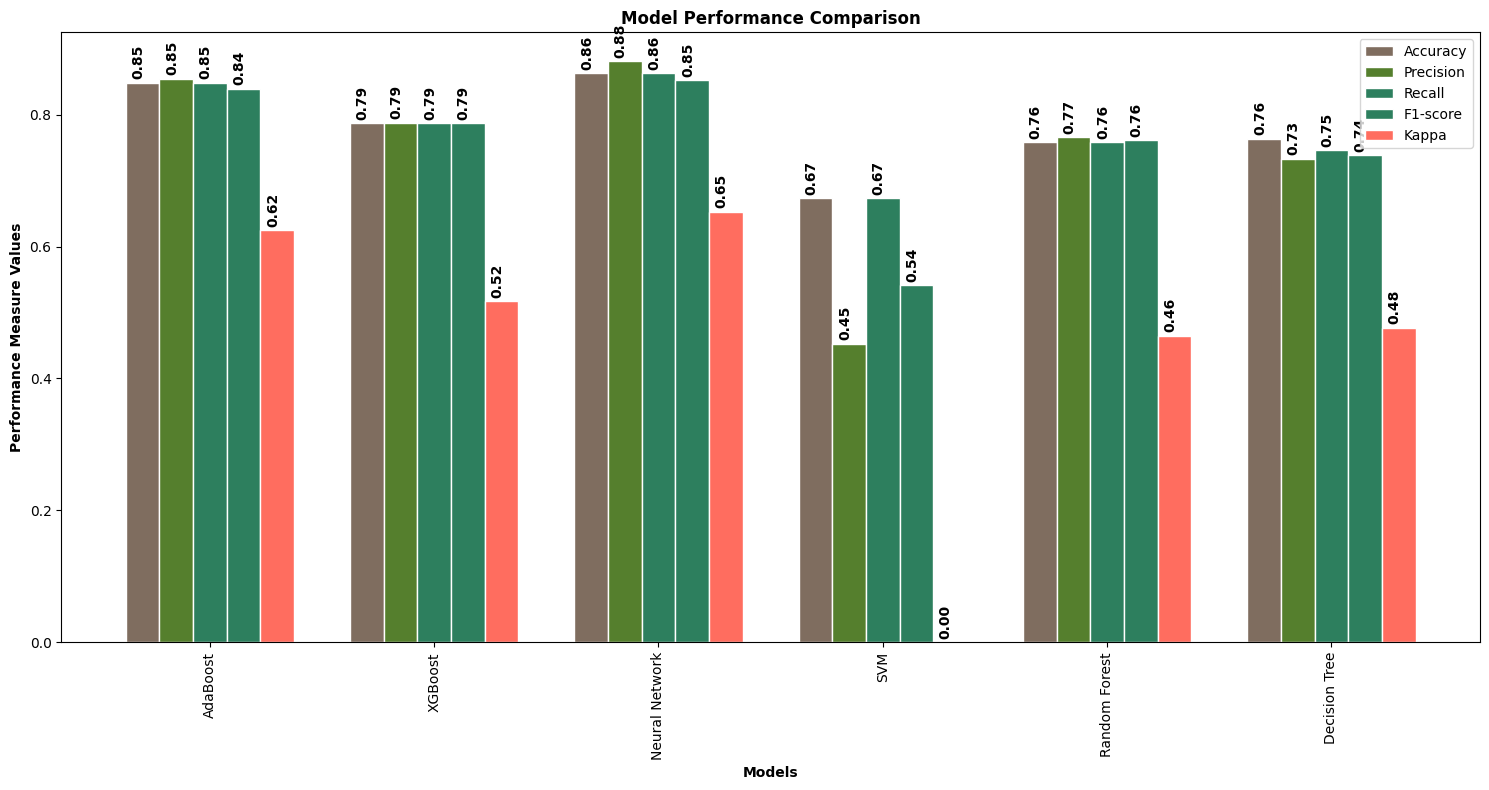

In [ ]:
# prompt: # prompt: plot bar chart for models with accuracy, precision, recall, f1-score, specificity, and kappa constant based on the model and display the value 90 degree rotation

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the metrics for each model
# and stored them in variables like accuracy_dt, precision_dt, etc.

models = ['Decision Tree',  'Random Forest', 'SVM', 'Neural Network', 'XGBoost', 'AdaBoost']
accuracy = [accuracy_dt,  accuracy_rf, accuracy_svm, accuracy_nn, accuracy_xgb, accuracy_ada]
precision = [precision_dt,  precision_rf, precision_svm, precision_nn, precision_xgb, precision_ada]
recall = [recall_dt,  recall_rf, recall_svm, recall_nn, recall_xgb, recall_ada]
f1 = [f1_dt,  f1_rf, f1_svm, f1_nn, f1_xgb, f1_ada]
# For simplicity, let's assume you have average specificity values
kappa = [kappa_dt,  kappa_rf, kappa_svm, kappa_nn, kappa_xgb, kappa_ada]

# Reverse the order of models and metrics
models = models[::-1]
accuracy = accuracy[::-1]
precision = precision[::-1]
recall = recall[::-1]
f1 = f1[::-1]
kappa = kappa[::-1]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r6 = [x + bar_width for x in r4]

# Create the bar chart
plt.figure(figsize=(15, 8))
plt.bar(r1, accuracy, color='#7f6d5f', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='#557f2d', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='#2d7f5e', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1, color='#2d7f5e', width=bar_width, edgecolor='white', label='F1-score')
plt.bar(r6, kappa, color='#ff6d5f', width=bar_width, edgecolor='white', label='Kappa')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width * 2 for r in range(len(models))], models, rotation='vertical')  # Rotate x-axis labels
plt.ylabel('Performance Measure Values', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold')

# Add the performance measure values on top of the bars with 90-degree rotation
for i, v in enumerate(accuracy):
    plt.text(r1[i] - 0.05, v + 0.01, "{:.2f}".format(v), color='black', fontweight='bold', rotation=90)
for i, v in enumerate(precision):
    plt.text(r2[i] - 0.05, v + 0.01, "{:.2f}".format(v), color='black', fontweight='bold', rotation=90)
for i, v in enumerate(recall):
    plt.text(r3[i] - 0.05, v + 0.01, "{:.2f}".format(v), color='black', fontweight='bold', rotation=90)
for i, v in enumerate(f1):
    plt.text(r4[i] - 0.05, v + 0.01, "{:.2f}".format(v), color='black', fontweight='bold', rotation=90)
for i, v in enumerate(kappa):
    plt.text(r6[i] - 0.05, v + 0.01, "{:.2f}".format(v), color='black', fontweight='bold', rotation=90)

# Add legend
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:
# prompt: plot roc curves for binary classifier for decision tree, random forest, svm, neural network, xgboost and adaboost along with auc
"""
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and the predicted probabilities for each model are already defined
# Example: y_pred_proba_dt for decision tree, y_pred_proba_rf for random forest, etc.

# Calculate ROC curve and AUC for each model
y_pred_proba_dt = dt_model.predict_proba(X_test)  # Calculate probabilities before using in roc_curve
# Calculate ROC curve and AUC for each model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:, 1])  # Assuming binary classification
roc_auc_dt = auc(fpr_dt, tpr_dt)


y_pred_proba_rf = rf_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

svm_clf = SVC(probability=True)  # Set probability=True
# Train the classifier
svm_clf.fit(X_train, y_train)
y_pred_proba_svm= svm_clf.predict_proba(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

y_pred_proba_nn = model.predict(X_test)  # Assuming you have a trained neural network model
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn[:, 1])
roc_auc_nn = auc(fpr_nn, tpr_nn)


y_pred_proba_xgb = xgb_clf.predict_proba(X_test)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

y_pred_proba_ada = ada_clf.predict_proba(X_test)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_proba_ada[:, 1])
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color='darkblue', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label='Neural Network (AUC = %0.2f)' % roc_auc_nn)
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_ada, tpr_ada, color='black', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_ada)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


ValueError: multiclass format is not supported

In [ ]:
# prompt: plot roc curves for binary classifier for decision tree, random forest, svm, neural network, xgboost and adaboost along with auc
"""
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming y_test and the predicted probabilities for each model are already defined
# Example: y_pred_proba_dt for decision tree, y_pred_proba_rf for random forest, etc.

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

#Decision Tree
y_pred_proba_dt = dt_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

#Random Forest
y_pred_proba_rf = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

#SVM
svm_clf = SVC(probability=True)  # Set probability=True
# Train the classifier
svm_clf.fit(X_train, y_train)
y_pred_proba_svm= svm_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(n_classes):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

#Neural Network
y_pred_proba_nn = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr_nn = dict()
tpr_nn = dict()
roc_auc_nn = dict()
for i in range(n_classes):
    fpr_nn[i], tpr_nn[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_nn[:, i])
    roc_auc_nn[i] = auc(fpr_nn[i], tpr_nn[i])

#XGBoost
y_pred_proba_xgb = xgb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

#AdaBoost
y_pred_proba_ada = ada_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_ada = dict()
tpr_ada = dict()
roc_auc_ada = dict()
for i in range(n_classes):
    fpr_ada[i], tpr_ada[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_ada[:, i])
    roc_auc_ada[i] = auc(fpr_ada[i], tpr_ada[i])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


In [ ]:
# Plot ROC curves
"""
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color='darkblue', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label='Neural Network (AUC = %0.2f)' % roc_auc_nn)
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_ada, tpr_ada, color='black', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_ada)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

TypeError: must be real number, not dict

<Figure size 1000x800 with 0 Axes>

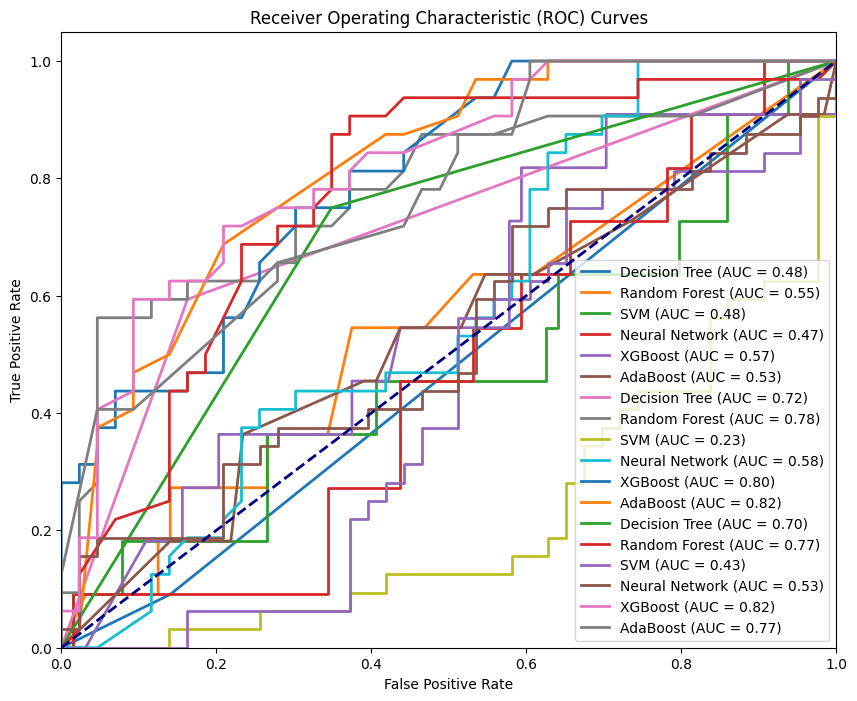

In [ ]:
# Plot ROC curves
"""
plt.figure(figsize=(10, 8))

# Iterate over each class and plot the ROC curve
for i in range(n_classes):
    plt.plot(fpr_dt[i], tpr_dt[i], lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt[i])
    plt.plot(fpr_rf[i], tpr_rf[i], lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf[i])
    plt.plot(fpr_svm[i], tpr_svm[i], lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm[i])
    plt.plot(fpr_nn[i], tpr_nn[i], lw=2, label='Neural Network (AUC = %0.2f)' % roc_auc_nn[i])
    plt.plot(fpr_xgb[i], tpr_xgb[i], lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb[i])
    plt.plot(fpr_ada[i], tpr_ada[i], lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_ada[i])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: single roc curve for each method FOR MULTIPLE CLASS

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test and the predicted probabilities for each model are already defined
# Example: y_pred_proba_dt for decision tree, y_pred_proba_rf for random forest, etc.

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Decision Tree
y_pred_proba_dt = dt_model.predict_proba(X_test)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_binarized[:, 1], y_pred_proba_dt[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest
y_pred_proba_rf = rf_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binarized[:, 1], y_pred_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# SVM
svm_clf = SVC(probability=True)  # Set probability=True
# Train the classifier
svm_clf.fit(X_train, y_train)
y_pred_proba_svm = svm_clf.predict_proba(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_binarized[:, 1], y_pred_proba_svm[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Neural Network
y_pred_proba_nn = model.predict(X_test)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test_binarized[:, 1], y_pred_proba_nn[:, 1])
roc_auc_nn = auc(fpr_nn, tpr_nn)

# XGBoost
y_pred_proba_xgb = xgb_clf.predict_proba(X_test)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_binarized[:, 1], y_pred_proba_xgb[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# AdaBoost
y_pred_proba_ada = ada_clf.predict_proba(X_test)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test_binarized[:, 1], y_pred_proba_ada[:, 1])
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color='darkblue', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label='Neural Network (AUC = %0.2f)' % roc_auc_nn)
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_ada, tpr_ada, color='black', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_ada)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


IndexError: index 1 is out of bounds for axis 1 with size 1

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


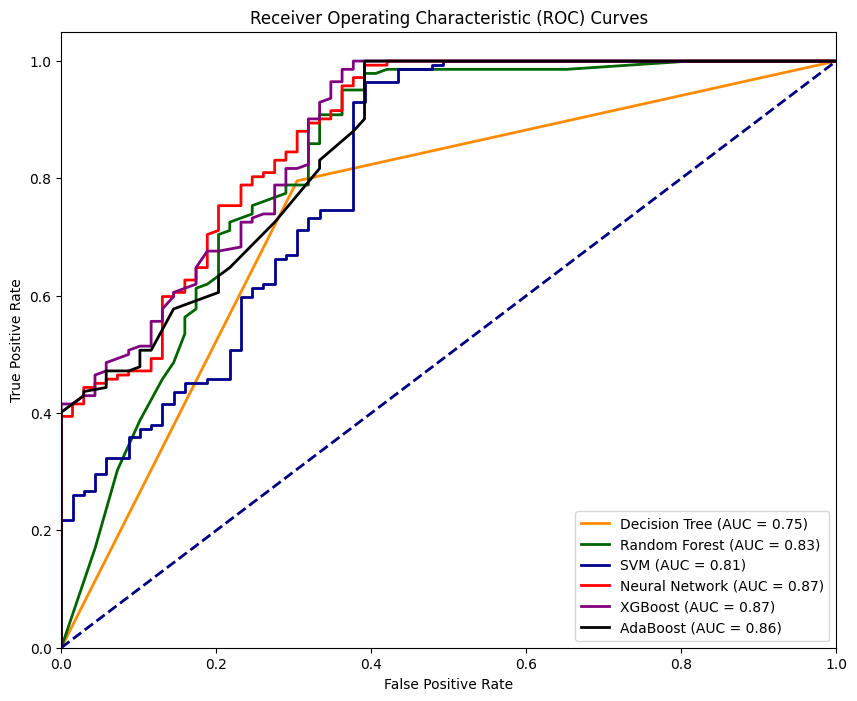

In [ ]:
# prompt: roc curve for decision tree, random forest, svm, neural network, xgboost and adaboost
# prompt: plot roc curves for binary classifier for decision tree, random forest, svm, neural network, xgboost and adaboost along with auc

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and the predicted probabilities for each model are already defined
# Example: y_pred_proba_dt for decision tree, y_pred_proba_rf for random forest, etc.

# Calculate ROC curve and AUC for each model
y_pred_proba_dt = dt_model.predict_proba(X_test)  # Calculate probabilities before using in roc_curve
# Calculate ROC curve and AUC for each model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:, 1])  # Assuming binary classification
roc_auc_dt = auc(fpr_dt, tpr_dt)


y_pred_proba_rf = rf_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

svm_clf = SVC(probability=True)  # Set probability=True
# Train the classifier
svm_clf.fit(X_train, y_train)
y_pred_proba_svm= svm_clf.predict_proba(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

y_pred_proba_nn = model.predict(X_test)  # Assuming you have a trained neural network model
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn[:, 1])
roc_auc_nn = auc(fpr_nn, tpr_nn)


y_pred_proba_xgb = xgb_clf.predict_proba(X_test)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

y_pred_proba_ada = ada_clf.predict_proba(X_test)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_proba_ada[:, 1])
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color='darkblue', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label='Neural Network (AUC = %0.2f)' % roc_auc_nn)
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_ada, tpr_ada, color='black', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_ada)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# prompt: Average Variance of Attributes

import numpy as np
# Assuming X is your feature matrix (NumPy array or pandas DataFrame)
average_variance = np.var(X, axis=0).mean()
print("Average Variance of Attributes:", average_variance)


Average Variance of Attributes: 20167.586505873453
